# Objective:To apply Classification algorithm on MNIST data

1.First we need to fetch the data from Scikit_Learn

In [162]:
import numpy as np
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist) # fetch_openml() returns an unsorted dataset

In [163]:
# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [164]:
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [165]:
mnist.data.shape

(70000, 784)

In [166]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [167]:
y.shape

(70000,)

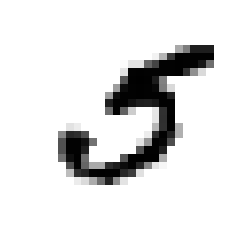

In [168]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [169]:
y[36000]

5

In [170]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


# Binary classifier

In [171]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [172]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [173]:
#now we can detect images of the number 5
sgd_clf.predict([some_digit])


array([ True])

In [174]:
some_digit1=X_test[1030]
sgd_clf.predict([some_digit1])

array([False])

# Performance Measures:

# 1.Measuring Accuracy Using Cross_Validation:

In [175]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

array([0.96695, 0.95135, 0.96775])

Now,let's look at a very dumb classifier that just classifies every single image in the "not 5" class:

In [176]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
     def fit(self, X, y=None):
        pass
     def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [177]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91   , 0.9099 , 0.90905])

It has over 90% accuracy ,Bcz only 10% of images are 5s,so if we always guess that image is not a 5,we will bw right about 90% of time.This demonstrates why accuracy is generally not the preffered performance measure for classifiers,especially we have skewed datasets.

# 2.Confusion Matrix

The general idea is to count the number of times instances of class A are slassified as class B.
To compute the confusion matrix,we first need to have a set of predictions,so they can be compared with actual targets.

In [178]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

cross_val_score() perform K-fold cross-validation, but instead of returning the evaluation scores,it returns the prediction made on each test fold.

In [179]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53566,  1013],
       [ 1266,  4155]], dtype=int64)

Each row in a confusin matrix represent an actual class, while each column represent a predicted class.The first row of this matrix consider non-5s(the negative class):54191 of them were correctly classified as non-5s(they are called True negative),while an remaining 388 were wrongly classified as 5s(false positive).the second row considers the images of 5s(the positive class):1939 were wrongly classified as non-5s(false negatives),while the remaining 3482 were correctly classified as 5s(true positive).A perfect classifier would have only true positives and true negatives,so its confusion matrix would have nonzero values on its main diagonal.

In [180]:
y_train_perfect_predictions = y_train_5

In [181]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

# 3. Precision and Recall:

In [182]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8039860681114551

In [183]:
recall_score(y_train_5, y_train_pred)

0.7664637520752628

# 4.F1 Score:

In [184]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7847766550193597

# Precision/Recall Tradeoff:

In [185]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([106400.43989794])

In [186]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [187]:
y_some_digit_pred

array([ True])

In [188]:
threshold = 300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [189]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")


c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

In [190]:
y_scores.shape

(60000,)

In [191]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

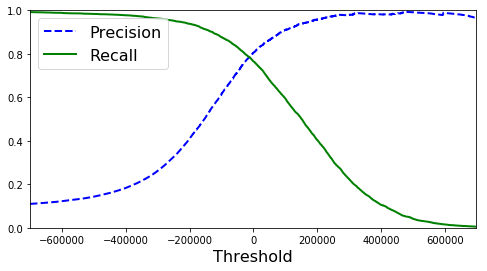

In [192]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [193]:
(y_train_pred == (y_scores > 0)).all()

True

In [194]:
y_train_pred_90 = (y_scores > 70000)

In [195]:
precision_score(y_train_5, y_train_pred_90)

0.8824716267339218

In [196]:
recall_score(y_train_5, y_train_pred_90)

0.6454528684744512

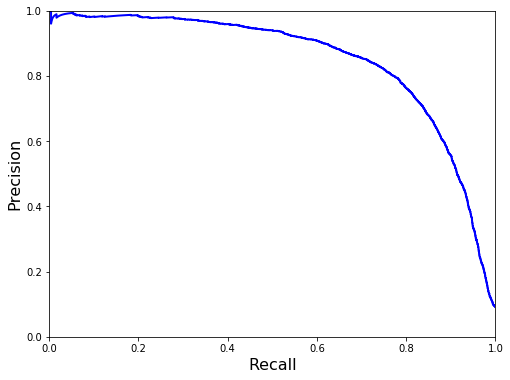

In [197]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

# ROC Curve:

the receiver operating characteristic(ROC) curve another common tool used with binary classifiers.the ROC curve plts the true positive rate against the false positive rate.

In [198]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

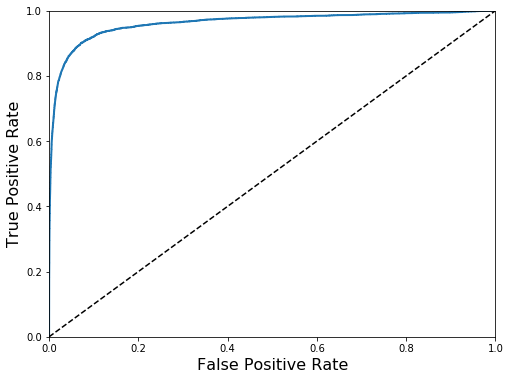

In [199]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [200]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9626287258165594

# Random Forest Classifier:

In [201]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

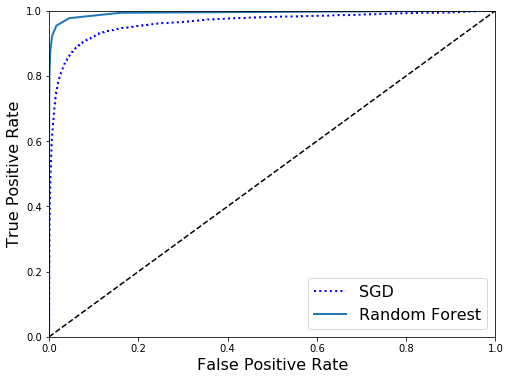

In [202]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [203]:
roc_auc_score(y_train_5, y_scores_forest)


0.9930197071640515

In [204]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9850187265917603

In [205]:
recall_score(y_train_5, y_train_pred_forest)

0.8247555801512636

# Multiclass classification:

At firt we wil use binary classifier for doing multiclass classification using one-verses-all strategy or one-verses-one strategy.

# Lets try with SGDClassifier:

In [206]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5], dtype=int8)

In [207]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores


array([[-105596.61329382, -396527.07437483, -385004.86986431,
        -388156.92338972, -309279.81201788,  106400.43989794,
        -788446.81659031, -152916.99486024, -687107.97203348,
        -562993.68872569]])

In [208]:
np.argmax(some_digit_scores)

5

In [209]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [210]:
sgd_clf.classes_[5]

5

# OneVsOneClassifier:

In [211]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


array([5], dtype=int8)

In [212]:
len(ovo_clf.estimators_)

45

# RandomForestClassifier:

In [213]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [214]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0.1]])

# SGDClassifier Accuracy:

In [215]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

array([0.88272346, 0.85734287, 0.84147622])

we can increase the accuracy by applying preprocessing on train data.

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

array([0.91196761, 0.90499525, 0.91053658])

# Error Analysis:

# Confusion matrix

In [217]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\vikrant rajput\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

array([[5730,    2,   23,    8,   11,   49,   49,    8,   38,    5],
       [   2, 6480,   45,   23,    5,   49,    5,    9,  111,   13],
       [  60,   40, 5305,   91,   91,   29,  101,   55,  171,   15],
       [  50,   37,  137, 5346,    3,  233,   34,   52,  138,  101],
       [  22,   29,   38,    7, 5378,    9,   51,   27,   77,  204],
       [  72,   45,   34,  184,   73, 4607,  105,   25,  187,   89],
       [  29,   25,   50,    2,   38,   97, 5624,    4,   48,    1],
       [  24,   25,   69,   26,   67,   10,    8, 5778,   14,  244],
       [  52,  149,   73,  155,   15,  150,   61,   24, 5025,  147],
       [  46,   33,   27,   83,  177,   33,    3,  191,   79, 5277]],
      dtype=int64)

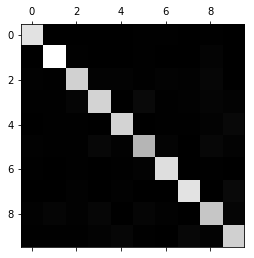

In [218]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [219]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

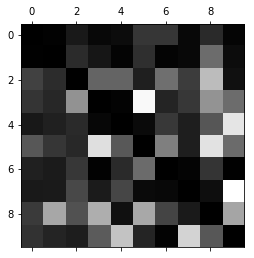

In [220]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilable Classification:

In [222]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [223]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [224]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.977672582406222

# Multioutput Classification:

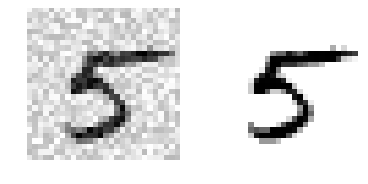

In [225]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

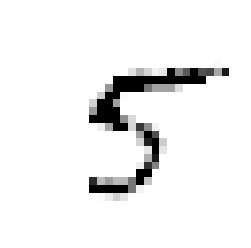

In [229]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
plt.show()

